In [147]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [148]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [149]:
NUM_CLASSES = 8

# 学習データ読み込み

In [150]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [151]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [153]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [154]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_20 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [156]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [157]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
25/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1253 - loss: 2.1183
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1368 - loss: 2.0881 - val_accuracy: 0.2209 - val_loss: 1.8992
Epoch 2/1000
22/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1947 - loss: 1.9061 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2042 - loss: 1.8888 - val_accuracy: 0.2890 - val_loss: 1.7383
Epoch 3/1000
26/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2527 - loss: 1.7582 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2548 - loss: 1.7451 - val_accuracy: 0.3980 - val_loss: 1.5705
Epoch 4/1000
25/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 1.6411 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5699 - loss: 1.0842 - val_accuracy: 0.7774 - val_loss: 0.7883
Epoch 25/1000
25/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5808 - loss: 1.0815 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5790 - loss: 1.0796 - val_accuracy: 0.7809 - val_loss: 0.7775
Epoch 26/1000
25/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 1.0705 
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5686 - loss: 1.0706 - val_accuracy: 0.7937 - val_loss: 0.7700
Epoch 27/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5955 - loss: 1.0567
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5954 - loss: 1.0567 - val_accuracy: 0.7990 - val_loss: 0.7512
Epoch 28/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s

23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6487 - loss: 0.9299 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6449 - loss: 0.9343 - val_accuracy: 0.8304 - val_loss: 0.5961
Epoch 49/1000
25/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - loss: 0.8888 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6541 - loss: 0.8976 - val_accuracy: 0.8351 - val_loss: 0.5900
Epoch 50/1000
25/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 0.9281 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6502 - loss: 0.9299 - val_accuracy: 0.8357 - val_loss: 0.5846
Epoch 51/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6399 - loss: 0.9650 
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6691 - loss: 0.8828 - val_accuracy: 0.8514 - val_loss: 0.5352
Epoch 72/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - loss: 0.8511 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6819 - loss: 0.8610 - val_accuracy: 0.8537 - val_loss: 0.5298
Epoch 73/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6608 - loss: 0.8625 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6629 - loss: 0.8665 - val_accuracy: 0.8561 - val_loss: 0.5282
Epoch 74/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - loss: 0.8598 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6695 - loss: 0.8710 - val_accuracy: 0.8514 - val_loss: 0.5343
Epoch 75/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0

20/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.8783 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6829 - loss: 0.8695 - val_accuracy: 0.8666 - val_loss: 0.4974
Epoch 96/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.8767 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6823 - loss: 0.8736 - val_accuracy: 0.8619 - val_loss: 0.5037
Epoch 97/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.8156 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 0.8215 - val_accuracy: 0.8671 - val_loss: 0.4950
Epoch 98/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - loss: 0.8553 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6797 - loss: 0.8378 - val_accuracy: 0.8695 - val_loss: 0.4862
Epoch 119/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.8454 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6788 - loss: 0.8424 - val_accuracy: 0.8596 - val_loss: 0.4962
Epoch 120/1000
21/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.8156 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6973 - loss: 0.8221 - val_accuracy: 0.8631 - val_loss: 0.4910
Epoch 121/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - loss: 0.8422 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6886 - loss: 0.8355 - val_accuracy: 0.8642 - val_loss: 0.4754
Epoch 122/1000
24/41 ━━━━━━━━━━━━━━━

Epoch 142/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6921 - loss: 0.8134 
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6933 - loss: 0.8193 - val_accuracy: 0.8683 - val_loss: 0.4780
Epoch 143/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.8121 
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6953 - loss: 0.8102 - val_accuracy: 0.8596 - val_loss: 0.4776
Epoch 144/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.8166 
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6932 - loss: 0.8151 - val_accuracy: 0.8648 - val_loss: 0.4763
Epoch 145/1000
19/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 0.8236 
Epoch 145: saving model to model/keypoint_classifier/keypoint_

33/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.7986
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6986 - loss: 0.7979 - val_accuracy: 0.8666 - val_loss: 0.4666
Epoch 166/1000
22/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.8221 
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6826 - loss: 0.8133 - val_accuracy: 0.8712 - val_loss: 0.4650
Epoch 167/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.8192 
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7142 - loss: 0.8094 - val_accuracy: 0.8741 - val_loss: 0.4584
Epoch 168/1000
23/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.7918 
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.keras

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7083 - loss: 0.7906 - val_accuracy: 0.8747 - val_loss: 0.4517
Epoch 189/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7135 - loss: 0.7855 
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7134 - loss: 0.7898 - val_accuracy: 0.8800 - val_loss: 0.4463
Epoch 190/1000
25/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.8072 
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7034 - loss: 0.8045 - val_accuracy: 0.8765 - val_loss: 0.4531
Epoch 191/1000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7114 - loss: 0.7801
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7114 - loss: 0.7801 - val_accuracy: 0.8747 - val_loss: 0.4470
Epoch 192/1000
20/41 ━━━━━━━━━━━━━━━━

Epoch 212/1000
24/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7025 - loss: 0.7832 
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7077 - loss: 0.7805 - val_accuracy: 0.8706 - val_loss: 0.4473
Epoch 213/1000
22/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7109 - loss: 0.7941 
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7107 - loss: 0.7927 - val_accuracy: 0.8730 - val_loss: 0.4495
Epoch 214/1000
21/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.7985 
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7064 - loss: 0.7884 - val_accuracy: 0.8741 - val_loss: 0.4468
Epoch 215/1000
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.7970
Epoch 215: saving model to model/keypoint_classifier/keypoint_c

In [158]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8788 - loss: 0.4425 


In [159]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [160]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[2.0418188e-01 5.2722502e-01 2.2706565e-01 3.4391436e-05 3.0141871e-02
 1.1351194e-02 6.8487562e-09 3.6084282e-09]
1


# 混同行列

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


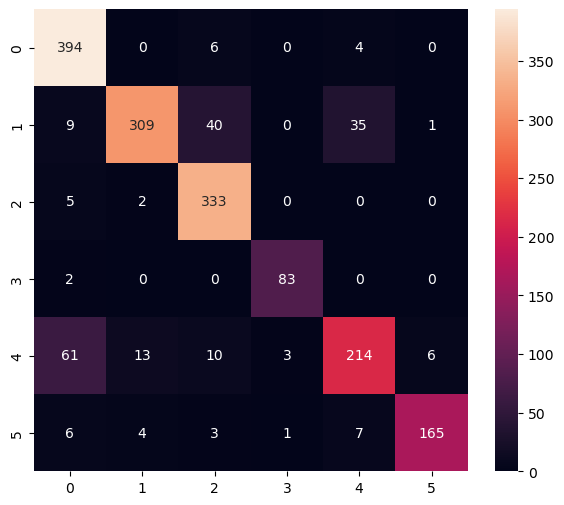

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.98      0.89       404
           1       0.94      0.78      0.86       394
           2       0.85      0.98      0.91       340
           3       0.95      0.98      0.97        85
           4       0.82      0.70      0.75       307
           5       0.96      0.89      0.92       186

    accuracy                           0.87      1716
   macro avg       0.89      0.88      0.88      1716
weighted avg       0.88      0.87      0.87      1716



In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [162]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [163]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpqbfmvu1h/assets


INFO:tensorflow:Assets written to: /tmp/tmpqbfmvu1h/assets


Saved artifact at '/tmp/tmpqbfmvu1h'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  140393223166992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140393223167952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140393223167760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140393223175632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140393223175056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140393223168912: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1738065379.870689   68752 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1738065379.870705   68752 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-28 12:56:19.870929: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpqbfmvu1h
2025-01-28 12:56:19.871533: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-28 12:56:19.871550: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpqbfmvu1h
2025-01-28 12:56:19.876094: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-28 12:56:19.902891: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpqbfmvu1h
2025-01-28 12:56:19.912109: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 41182 microseconds.


6764

# 推論テスト

In [164]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [165]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [166]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [167]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 548 µs, sys: 0 ns, total: 548 µs
Wall time: 434 µs


In [168]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0418191e-01 5.2722508e-01 2.2706556e-01 3.4391371e-05 3.0141894e-02
 1.1351179e-02 6.8487300e-09 3.6084147e-09]
1
